# Point Estimates

> The sample statistic is calculated from the sample data and the population parameter is inferred (or estimated) from this sample statistic. Let me say that again: Statistics are calculated, parameters are estimated. - James Jones [(Source)](https://people.richland.edu/james/lecture/m170/ch08-int.html)

## Data

A sample of wage and classification information of 12,401 City of Seattle Employees as of October 2019 is provided in the [`data/raw/`](../../data/raw/seattle_wage_data.json) directory. Exclusions may apply for vulnerable populations. 

_The entire population is available for [download here](https://data.seattle.gov/City-Business/City-of-Seattle-Wage-Data/2khk-5ukd/data)._

with open("../../data/raw/seattle_wage_data.json", "r") as f:
    city_wages = json.load(f)

city_wages_df = pd.DataFrame(data=city_wages)
city_wages_df.head()

## Import Necessary Packages

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
import random

## Import Necessary Data

In [8]:
total_employees = 12401
sample_size = 500

## Call the API to Retrieve the City of Seattle Wage Data

Randomly select 500 employees of the 12,401. How would you do this?

You may find this helpful: https://dev.socrata.com/docs/queries/. 

### 1. Make a request to the API

### 2. Limit request to obtain one single employee

### 3. Pick the 50th employee

### 4. Pick one single random employee

### 5. Pick 500 random employees

*Note: store this list as `city_wages`*

In [14]:
random.seed(2019)

url = "https://data.seattle.gov/resource/2khk-5ukd.json"

city_wages = []

for _ in range(0, 5):
    params = {"$limit": 1, "$offset": random.randint(a=0, b=total_employees)}
    request = requests.get(url=url, params=params)
    city_wages.extend(request.json())

### 6. Transform `city_wages` into a DataFrame (`city_wages_df`) and calculate the mean `hourly_rate` from your random sample

In [17]:
city_wages_df = pd.DataFrame(city_wages)
city_wages_df.head()

,department,last_name,first_name,job_title,hourly_rate
0,Parks & Recreation,Tooley,Jason,Res&Eval Asst,31.63
1,Seattle Public Utilities,Vaokakala,Tevita,Drainage&Wstwtr Coll Wkr CI,31.33
2,Construction & Inspections,Steele,Samuel,"Manager2,Engrng&Plans Rev",53.44
3,Police Department,Smith,Bretton,Pol Ofcr-Patrl-BWV,60
4,Parks & Recreation,Brown,Tyson,Seattle Conserv Corps Supv *,29.56


In [19]:
city_wages_df["hourly_rate"].astype(float).mean()

41.19199999999999

### 7. Make a visualization that shows the distribution of `hourly_rate`

*Note: please assign a title to your plot and label your axes as well*

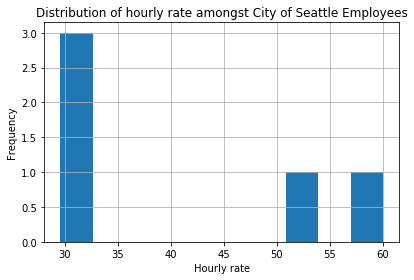

In [24]:
fig, ax = plt.subplots()

city_wages_df["hourly_rate"].astype(float).hist(ax=ax)
ax.set_xlabel("Hourly rate")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of hourly rate amongst City of Seattle Employees")

fig.tight_layout()